# **Tarea 5: exploración de scikit-learn (sklearn) y statsmodels**

**scikit-learn (sklearn):**

scikit-learn es una biblioteca de aprendizaje automático de código abierto para Python que se utiliza ampliamente en tareas de aprendizaje automático, minería de datos y análisis de datos. Ofrece herramientas eficientes y fáciles de usar para la clasificación, regresión, clustering, reducción de dimensionalidad y selección de modelos.

**Principales Funciones**

---

**Aprendizaje Supervisado:** 

sklearn proporciona algoritmos para la clasificación y regresión como:

Support Vector Machines (SVM). 

Random Forest.

Regresión Logística.

**Aprendizaje No Supervisado:** 

Incluye algoritmos de clustering como K-Means, y técnicas de reducción de dimensionalidad como PCA (Análisis de Componentes Principales).

**Herramientas de Preprocesamiento:**

Ofrece herramientas para el preprocesamiento de datos, como la normalización, estandarización, manejo de valores nulos, etc.

**Validación de Modelos:**

Incluye funciones para la evaluación y validación de modelos, como la validación cruzada.

**Selección de Modelos:** 

Ayuda a seleccionar los mejores modelos y hiperparámetros a través de búsqueda grid y búsqueda aleatoria.

**Interoperabilidad:** 

Compatible con otras bibliotecas populares como NumPy, pandas, y Matplotlib.

# **statsmodels:**

statsmodels es una biblioteca de Python que se enfoca en estadísticas y modelos estadísticos. Proporciona herramientas para realizar análisis de datos, estimar modelos estadísticos y realizar pruebas de hipótesis.

**Funcionalidades Principales:**

**Modelos Estadísticos:**

Permite ajustar modelos estadísticos, como regresiones lineales, regresiones logísticas, modelos ARIMA, y más.

**Pruebas de Hipótesis:**

Proporciona funciones para realizar pruebas de hipótesis estadísticas y análisis de varianza.

**Visualización de Datos:**

Incluye capacidades de visualización para ayudar a interpretar los resultados de los modelos estadísticos.

**Análisis de Series Temporales:**

Ofrece herramientas para el análisis de series temporales y pronóstico.

**Compatibilidad con Fórmulas:**

Permite especificar modelos utilizando fórmulas similares a las utilizadas en R.

### 3. Exploración de scikit-learn (sklearn): 

In [119]:
import pandas as pd

In [120]:
df = pd.read_csv("cars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## **Preprocesamiento**

Renombrar variables 

In [121]:
df.rename(columns={'Unnamed: 0': 'marca','mpg': 'millas_galon'}, inplace=True)
df.head()

,marca,millas_galon,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Recategorizar variables

In [122]:
set(df["cyl"])

mapeo_categorias = {4: 'Bajo', 6: 'Medio', 8: 'Alto'}

# Aplicar el mapeo utilizando map()
df['cyl'] = df['cyl'].map(mapeo_categorias)
df.head()

,marca,millas_galon,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,Medio,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,Medio,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,Bajo,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,Medio,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,Alto,360.0,175,3.15,3.440,17.02,0,0,3,2


Algoritmo

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Cargar los datos en un DataFrame de pandas (supongamos que se llama 'df')
# Asegúrate de que df contiene todas las variables mencionadas anteriormente

# Seleccionar las características y la variable objetivo
X = df[['disp', 'hp', 'wt']]
y = df['millas_galon']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
coefficients

,Variable,Coeficiente
0,disp,0.003213
1,hp,-0.031633
2,wt,-4.945615


In [124]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

*error cuadrático*

$ (R^2 = 1 - \frac{SSR}{SST}) $

In [125]:
print(f" (R²): {r_squared}")

 (R²): -0.005568857619536072


*Error cuadrático medio (MSE)*

$ (MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2) $

In [126]:
print(f"(MSE): {mse}")

(MSE): 11.951493700009499


In [127]:
# Para realizar una predicción para un nuevo conjunto de características, puedes hacer lo siguiente:

predicted_mpg = model.predict(X_test)

print(f"Predicción de millas por galón:")

predicted_mpg[0]

Predicción de millas por galón:


14.962259661686758

## Grafico

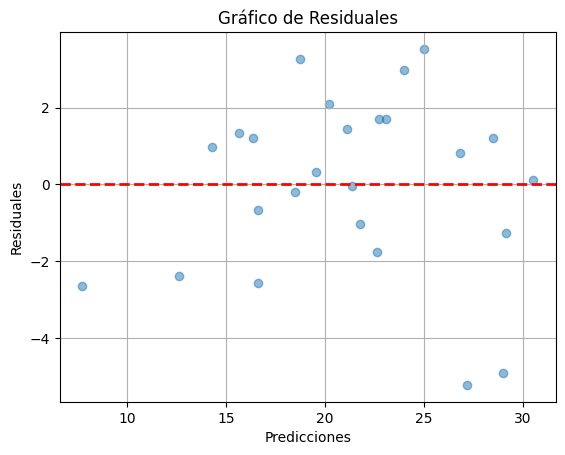

In [128]:
import matplotlib.pyplot as plt

# Calcular los residuales (diferencia entre los valores reales y las predicciones)
y_pred = model.predict(X_train)
residuales = y_pred - y_train

# Crear un gráfico de dispersión de los residuales
plt.scatter(y_pred, residuales, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.grid(True)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuales Nulos')
plt.show()


### **4. Exploración de statsmodels:**

In [136]:
import statsmodels.api as sm

X = df[['disp', 'hp', 'wt']]
y = df['millas_galon']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           millas_galon   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.65e-11
Time:                        23:50:51   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1055      2.111     17.579      0.0

In [ ]:
Logistica

In [153]:
import statsmodels.api as sm

umbral = 20

df['alto_rendimiento'] = (df['millas_galon'] > umbral).astype(int)

X = df[['disp', 'hp', 'wt',]]
y = df['alto_rendimiento']
X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       alto_rendimiento   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                   1.000
Time:                        00:01:58   Log-Likelihood:            -1.4663e-06
converged:                      False   LL-Null:                       -21.930
Covariance Type:            nonrobust   LLR p-value:                 1.616e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        575.5240   3.32e+08   1.73e-06      1.000   -6.51e+08    6.51e+08
disp           0.0594   2.69e+05   2.21e-07      1.000   -5.27e+0

C:\Users\pc\anaconda3\envs\marsh1\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [152]:
np.mean(df['millas_galon'] > 20)

0.4375